# Exploration project

================================================================================================

# 목차

### (1) 3가지 데이터셋을 이용한 머신러닝 (digits, wine, breast_cancer)
### (2) load_digits : 손글씨를 분류해 봅시다.
### (3) load_wine : 와인을 분류해 봅시다.
### (4) load_breast_cancer : 유방암 여부를 진단해 봅시다
### (5) 회고

---


# (1) 3가지 데이터셋을 이용한 머신러닝 (digits, wine, breast_cancer)
## 루브릭 평가 문항
1. 3가지 데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함 되었는가?
  
2. 3가지 데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?
  
3. 3가지 데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?
  
  

## 상세 기준
1. feature와 label 선정을 위한 데이터 분석과정을 전개함.
  
2. 모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음.
  
3. 모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음.
  
  


---


## 데이터 불러오기 및 필요한 모듈 import 하기

In [1]:
# datasets 에서 digits, wine, breast_cancer의 data를 load 함.
from sklearn.datasets import load_digits, load_wine, load_breast_cancer

# training 과 test를 나눠줄 함수를 가져옴.
from sklearn.model_selection import train_test_split

# 평가지표들을 가져옴.
from sklearn.metrics import classification_report

# 5가지 모델들을 미리 모두 가져옴
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression

--- 


# (2) load_digits : 손글씨를 분류해 봅시다

## 데이터 준비
1. Feature Data 지정하기  
  
2. Label Data 지정하기
  
3. Target Names 출력해 보기
  

In [2]:
# load해온 값을 변수에 지정
digits = load_digits()

# digits의 구성 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# target name 확인
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
# 데이터 할당하기

digits_data = digits.data
digits_label = digits.target
digits_feature = digits.feature_names

In [5]:
#digits의 shape 확인
digits_data.shape

(1797, 64)

## Data describe 해 보기

In [6]:
# 전체적인 정보 확인
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## training 과 test 데이터 분리

In [7]:
x_train, x_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size= 0.2,
                                                    random_state = 42)

### random_state란?
- scikit learn에서 사용하는 random_state 인자는 수행시마다 동일한 결과를 얻기 위해 적용합니다.
  
  
- train_test_split(..., test_size=0.2) 과 같은 함수는 80% train, 20% test 데이터 세트를 추출합니다. 하지만 추출된 데이터는 수행을 할때마다 다를수 있습니다. random하게 80%, 20%를 추출하기 때문입니다.
  
  
- 가령 1~ 100까지 일련번호로 된 100개의 데이터를 train_test_split(.., test_size=0.2) 로 수행하면 해당 함수를 첫번째 수행할 때는 1 ~ 80 번이 train, 81 ~ 100번이 test가 될 수 있지만, 다시 수행하면 이번에 21 ~ 100번이 train, 1 ~ 20번이 test가 될 수 있습니다. 80%, 20% 로 나누는건 동일하지만 함수를 수행 시마다 추출한 레코드들을 달라질수 있습니다. 내부적으로 80%, 20% 로 나눌때 random 함수를 적용합니다.
  
  
- random_state=1 이라고 하면 바로 이 random 함수의 seed 값을 고정시키기 때문에 여러번 수행하더라도 같은 레코드를 추출합니다. random 함수의 seed값을 random_state라고 생각하시면 됩니다.
  
  
- random_state를 어떤 값으로 하셔도 상관없습니다.  이는 random값을 고정하는 역할만 수행합니다.
  
  
- 가장 대중적으로 사용하는 random_state 값은 0, 42이다.
    
    
  
https://scikit-learn.org/stable/glossary.html#term-random_state 참고

## Decision tree model

In [8]:
tree_data = DecisionTreeClassifier(random_state = 42)

# 의사결정나무에 training 데이터를 fit 함.
tree_data.fit(x_train, y_train)
# .predict 를 이용해 test군으로 결과값 예측
d_pred_t = tree_data.predict(x_test)

print(classification_report(y_test, d_pred_t))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.87        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



#### 정확도(accuracy score)는 84% 이다.

---


## Random Forest model
### 특징
  
  
- 건강의 위험도를 예측하기 위해서는 많은 요소를 고려 성별, 키, 몸무게, 지역, 운동량, 흡연유무, 음주 여부, 혈당, 근육량, 기초 대사량 등 수많은 요소가 필요
  
  
- Feature가 30개라 했을 때 30개의 Feature를 기반으로 하나의 결정 트리를 만든다면 트리의 가지가 많아질 것이고, 이는 오버피팅의 결과를 야기
  
  
- 30개의 Feature 중 랜덤으로 5개의 Feature만 선택해서 하나의 결정 트리 생성
  
  
- 계속 반복하여 여러 개의 결정 트리 생성
  
  
- 여러 결정 트리들이 내린 예측 값들 중 가장 많이 나온 값을 최종 예측값으로 지정
  
  
- 이렇게 의견을 통합하거나 여러 가지 결과를 합치는 방식을 앙상블(Ensemble)이라고 함
  
  
- 하나의 거대한 (깊이가 깊은) 결정 트리를 만드는 것이 아니라 여러 개의 작은 결정 트리를 만드는 것
  
  
- 분류 : 여러 개의 작은 결정 트리가 예측한 값들 중 가장 많은 값, 회귀 : 평균

In [9]:
ran_data = RandomForestClassifier(random_state=42)

# Random_Forest에 training 데이터를 fit 함.
ran_data.fit(x_train, y_train)
# .predict를 이해 test 군으로 결과값 예측
d_pred_r = ran_data.predict(x_test)

print(classification_report(y_test, d_pred_r))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



#### 정확도(accuracy score)는 97% 이다

---


## SVM (Support Vector Model)
### SVM은 Support Vector 와 Hyperplane을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘
### SVM을 구성하는 지표
- Decision Boundary (결정 경계) : 두 개의 클래스를 구분해 주는 선
  
  
- Support Vector: Decision Boundary에 가까이 있는 데이터
  
  
- Margin: Decision Boundary와 Support Vector 사이의 거리

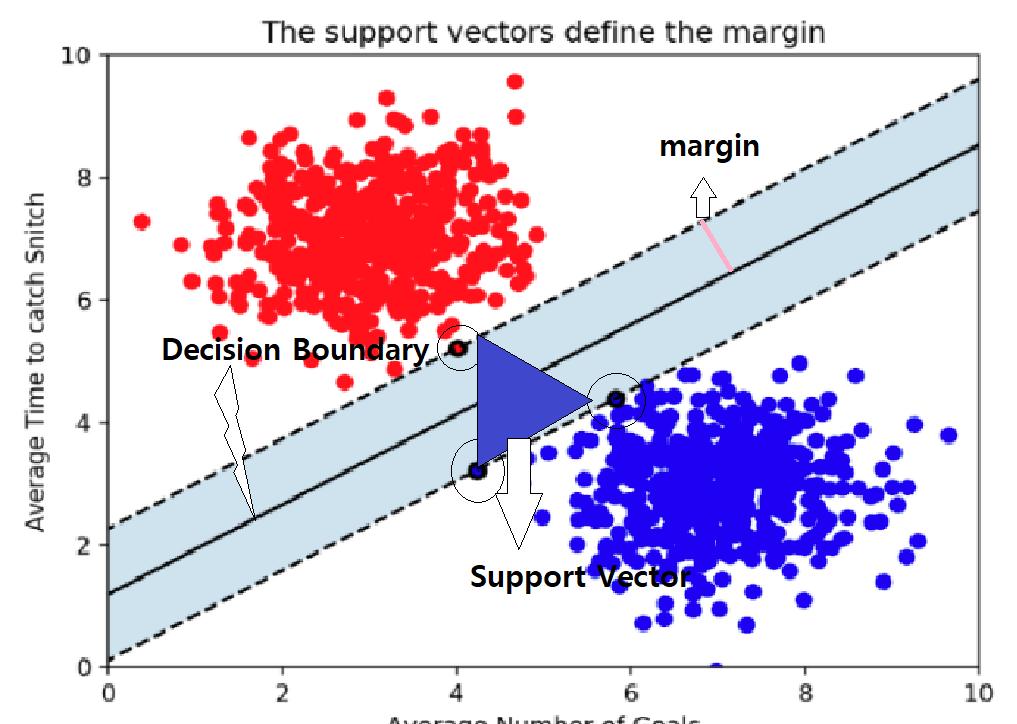

- Margin이 넓을수록 새로운 데이터를 잘 구분할 수 있다 (Margin 최대화 -> robustness 최대화)
  
  
- Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업. Linearly separable하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable 하도록 만든다. 
  
  
- cost: Decision Boundary와 Margin의 간격 결정. cost가 높으면 Margin이 좁아지고 train error가 작아진다. 그러나 새로운 데이터에서는 분류를 잘 할 수 있다. cost가 낮으면 Margin이 넓어지고, train error는 커진다.
  
  
- 2차원의 평면에서 3차원이 되면 초평면이 된다

### **SVC 함수에서 지정 가능한 대표적인 인자 목록

- kernel : 커널 함수 종류를 지정합니다. 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 중에서 지정 가능하며, 기본 값은 'rbf'로 설정되어 있습니다.

- C : regularization의 정도를 지정합니다. 클수록 L2 panelty가 증가합니다. 기본 값은 1.0으로 설정되어있습니다.

- degree : kernel이 'poly'일 때만 유효합니다. 커널 함수를 몇차 함수로 지정할지를 결정합니다.

- gamma : 'scale'과 'auto' 중에서 지정 가능합니다.  커널 함수가 'rbf', 'poly', 'sigmoid' 인 경우에 유효하며, 커널 계수를 지정하는 하이퍼파라미터입니다.

- random_state : 다른 머신러닝 모델과 마찬가지로 seed를 지정하여 실행시마다 결과를 고정하는 역할을 수행합니다.

https://web.archive.org/web/20150418043800/http://scikit-learn.org/stable/modules/svm.html#svm 참고

In [10]:
svm_data = svm.SVC(random_state=42)

#SVM data에 training 데이터를 fit함
svm_data.fit(x_train, y_train)

#.predict로 인한 예측값 창출
d_pred_sv = svm_data.predict(x_test)

print(classification_report(y_test, d_pred_sv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### 정확도(accuracy score)는 99%이다.

---


## 경사 하강법
### 경사 하강법을 사용하는 방법으론 크게 2가지가 있다.
### 배치 경사 하강법(Batch Gradient Descent, BGD) 과 SGD(Stochastic Gradient Descent Classifier)가 있다.

#### 1. 배치 경사 하강법(Batch Gradient Descent, BGD)
- 배치 경사 하강법은 경사 하강법의 손실 함수의 기울기 계산에 전체 학습 데이터셋의 크기와 동일하게 잡는 방법  
  
  
-  즉, 경사 하강법 대상이 배치 크기와 동일하다는 것.  
  
  
-  데이터셋 모두를 대상으로 하다 보니 파라미터가 한번 이동할 대마다, 계산해야 할 값이 지나치게 많으므로, 계산 시간도 엄청 길어지고, 소모되는 메모리도 엄청나다.
  
  
-  mini batch 안 모든 데이터를 대상으로 경사 하강법을 실시하므로, 안정적으로 수렴한다.
  
  
-  안정적으로 수렴하므로, 수렴까지 발생하는 총 파라미터 업데이트 수는 매우 적다.
  
  
-  안정적으로 수렴하는 것은 좋으나, 안정적으로 움직이기 때문에 지역 최소해(Local Minimum)에 빠지더라도 안정적으로 움직이므로 빠져나오기 힘들다. 즉, Local Optima(minimum) 문제가 발생할 가능성이 높다.
  
  
-  학습 데이터셋이 커지면 커질수록 시간과 리소스 소모가 지나치게 크다.

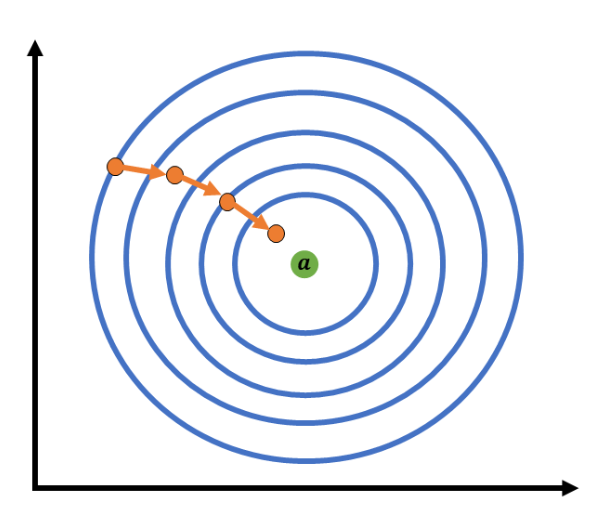

#### 2. 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
- 전체 훈련 데이터셋을 대상으로 학습하는 것은 한정된 리소스를 가지고 있는 우리의 분석 환경에서서 매우 비효율적이며, 파라미터 업데이트 수가 적다는 것은 랜덤 하게 뽑힌 시작 위치의 가중치 수도 적으므로, Local minimum현상이 발생할 확룰도 높다는것이다.
  
  
- 그래서 나온 방법이 학습 데이터셋에서 무작위로 한 개의 샘플 데이터셋을 추출하고, 그 샘플에 대해서만 기울기를 계산하는 것이다.
  
  
- 샘플 데이터셋에 대해서만 경사를 계산하므로, 매 반복에서 다뤄야 할 데이터 수가 매우 적어, 학습속도가 매우 빠르다.
  
  
- 하나의 샘플만 대상으로 경사를 계산하므로, 메모리 소모량이 매우 낮으며, 매우 큰 훈련 데이터셋이라 할지라도 학습이 가능하다.
  
  
- 그러나, 무작위로 추출된 샘플에 대해서 경사를 구하므로, 배치 경사 하강법보다 훨씬 불안정하게 움직인다.
  
  
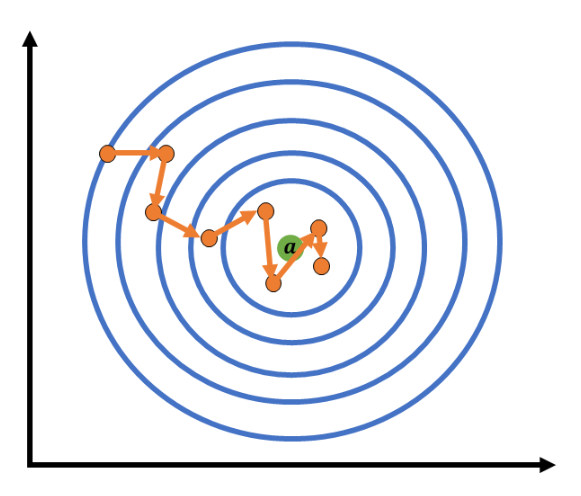

https://gooopy.tistory.com/69?category=824281 참고

#### 여기선 SGD를 사용한다.

In [11]:
sgd_data = SGDClassifier(random_state=42)

#SGD data에 training 데이터를 fit함
sgd_data.fit(x_train, y_train)

#.predict를 이용한 예측값 생성
d_pred_sg = sgd_data.predict(x_test)

print(classification_report(y_test, d_pred_sg))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      0.96      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.93      0.91      0.92        47
           6       0.94      0.97      0.96        35
           7       0.97      0.97      0.97        34
           8       0.90      0.87      0.88        30
           9       0.90      0.93      0.91        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



#### 정확도(accuracy score)는 96% 이다.

## Logistic Regression(로지스틱 회귀)
### 로지스틱 회귀란?
- 선형 회귀 방식을 분류에 적용한 것
- 회귀 계수가 선형이기 때문에 선형 회귀 계열이다.
- 결과값을 확률로 간주해 확률에 따라 분류 결정
- 클래스에 속하는지 아닌지를 예측하므로 이진 분류기
- 구조
- 결과값을 확률로 간주하기 위해 0~1 사이 값을 반환하는 시그모이드 함수를 이용한다.
### 특징
  
  
* 선 형태의 일반 선형 회귀보다 S자 형태의 시그모이드 함수를 적용한 로지스틱 회귀의 분류 정확도가 더 높다

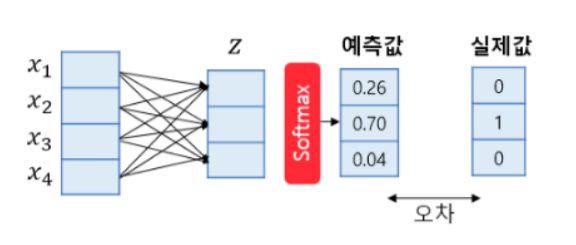

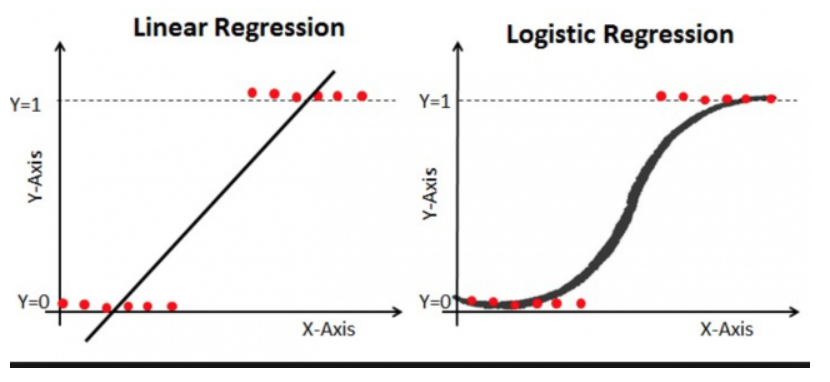
https://blog.naver.com/jgenny13/222168765235 참고

In [12]:
Lr_data = LogisticRegression(max_iter= 5000)

#Logistic data에 training 데이터를 fit함
Lr_data.fit(x_train, y_train)

#.predict를 이용한 예측값 생성
d_pred_Lr = Lr_data.predict(x_test)

print(classification_report(y_test, d_pred_Lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



#### 정확도(accuracy score)는 97% 이다.

---


## 모델 평가

- __현재 digits dataset의 경우 SGD 알고리즘이 가장 적합한것 같다.__
  
  
- 이유로는 전체적인 label들에 있어서 precision, recall, f1-score가 상당히 높게 나왔으므로 FP,FN 이 다른 모델에 비해 상대적으로 낮다는 것으로 오류가 적다는것을 의미하고 또한 정확도(accuracy score) 역시 99%로 가장 높아서 사용한 알고리즘 중 가장 적합하다고 판단됩니다.

---


# (3) load_wine : 와인을 분류해 봅시다

## 데이터 준비
1. Feature Data 지정하기  
  
2. Label Data 지정하기
  
3. Target Names 출력해 보기
  
  

In [13]:
# load해온 값을 변수에 지정
wine = load_wine()

# wine의 구성 확인
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [14]:
# target name 확인
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [15]:
# 데이터 할당하기

wine_data = wine.data
wine_label = wine.target
wine_feature = wine.feature_names

In [16]:
#digits의 shape 확인
wine_data.shape

(178, 13)

## Data describe 해 보기

In [17]:
# 전체적인 정보 확인
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## training 과 test 데이터 분리

In [18]:
a_train, a_test, b_train, b_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size= 0.2,
                                                    random_state = 42)

## Decision tree model

In [19]:
w_tree_data = DecisionTreeClassifier(random_state = 42)

# 의사결정나무에 training 데이터를 fit 함.
w_tree_data.fit(a_train, b_train)
# .predict 를 이용해 test군으로 결과값 예측
w_pred_t = w_tree_data.predict(a_test)

print(classification_report(b_test, w_pred_t))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



#### 정확도(accuracy score)는 94% 이다.

---


## Random Forest model

In [20]:
w_ran_data = RandomForestClassifier(random_state=42)

# Random_Forest에 training 데이터를 fit 함.
w_ran_data.fit(a_train, b_train)
# .predict를 이해 test 군으로 결과값 예측
w_pred_r = w_ran_data.predict(a_test)

print(classification_report(b_test, w_pred_r))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### 정확도(accuracy score)는 100% 이다

---


## SVM (Support Vector Model)

In [21]:
w_svm_data = svm.SVC(random_state=42)

#SVM data에 training 데이터를 fit함
w_svm_data.fit(a_train, b_train)

#.predict로 인한 예측값 창출
w_pred_sv = w_svm_data.predict(a_test)

print(classification_report(b_test, w_pred_sv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



#### 정확도(accuracy score)는 81%이다.

---


## SGD(Stochastic Gradient Descent) model


In [22]:
w_sgd_data = SGDClassifier(random_state=32)

#SGD data에 training 데이터를 fit함
w_sgd_data.fit(a_train, b_train)

#.predict를 이용한 예측값 생성
w_pred_sg = w_sgd_data.predict(a_test)

print(classification_report(b_test, w_pred_sg))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       1.00      0.21      0.35        14
           2       0.35      1.00      0.52         8

    accuracy                           0.58        36
   macro avg       0.78      0.64      0.57        36
weighted avg       0.86      0.58      0.58        36



#### 정확도(accuracy score)는 58% 이다.

---


## Logistic Regression(로지스틱 회귀)

In [23]:
w_Lr_data = LogisticRegression(max_iter= 5000)

#Logistic data에 training 데이터를 fit함
w_Lr_data.fit(a_train, b_train)

#.predict를 이용한 예측값 생성
w_pred_Lr = w_Lr_data.predict(a_test)

print(classification_report(b_test, w_pred_Lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### 정확도(accuracy score)는 100% 이다.

---


## 모델평가

- __현재의 wine dataset의 경우 RandomForest model , Logistic Regression model이 가장 적합한 것으로 판단된다.__
  
- 두 모델 모두 정확도(accuracy score)가 100%가 나왔으며 모든 수치(precision, recall, f1-score)가 높은 수치를 보여주고 있기 때문이다.  
  
- 하지만, sgd 모델의 class 1의 경우 recall이 매우 낮고 이유는 FN(False Negative)가 많다는 것, precision이 높은것으로 보아 TP(True Positive)는 알맞게 잘 나왔으나 FN(False Negative)가 상당히 높아 recall이 낮게 나온것으로 판단된다. class 2의 경우 precision이 낮은 이유는 FP(False Positive)가 많다는 것, recall이 높은것으로 보아 TP(True Positive)는 알맞게 잘 나왔으나 FP가 낮게 나온 경우로 생각된다.
  
- 이와 같이 정확도가 100%처럼 매우 높거나 혹은 58%같은 큰 오차율을 보이는 이유로는 데이터셋의 형태가 (178,13) 으로 상당히 적어 test군을 추출할 때 많은 상황을 가정할 수 없고 그에 따라 predict로 예측할때에도 같은 상황이 적용 되는것 같다.
  
- 이 dataset의 오류는 적은 data의 양 때문인 것으로 판단된다.

---


# (4) load_breast_cancer : 유방암 여부를 진단해 봅시다.

## 데이터 준비
1. Feature Data 지정하기  
  
2. Label Data 지정하기
  
3. Target Names 출력해 보기
  

In [24]:
# 오차행렬 import
from sklearn.metrics import confusion_matrix

In [25]:
# load해온 값을 변수에 지정
cancer = load_breast_cancer()

# breast_cancer의 구성 확인
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
# target name 확인
print(cancer.target_names)

['malignant' 'benign']


In [27]:
# 데이터 할당하기

can_data = cancer.data
can_label = cancer.target
can_feature = cancer.feature_names

In [28]:
#digits의 shape 확인
can_data.shape

(569, 30)

## Data describe 해 보기

In [29]:
# 전체적인 정보 확인
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## training 과 test 데이터 분리

In [30]:
c_train, c_test, d_train, d_test = train_test_split(can_data,
                                                    can_label,
                                                    test_size= 0.2,
                                                    random_state = 42)

---


## Decision tree model

In [31]:
c_tree_data = DecisionTreeClassifier(random_state = 42)

# 의사결정나무에 training 데이터를 fit 함.
c_tree_data.fit(c_train, d_train)
# .predict 를 이용해 test군으로 결과값 예측
c_pred_t = c_tree_data.predict(c_test)

print(classification_report(d_test, c_pred_t))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [32]:
print(confusion_matrix(d_test, c_pred_t))

[[40  3]
 [ 3 68]]


#### TP 40 FP 3 FN 3 TP 68 이다.

#### 정확도(accuracy score)는 95% 이다.

---


## Random Forest model

In [33]:
c_ran_data = RandomForestClassifier(random_state=42)

# Random_Forest에 training 데이터를 fit 함.
c_ran_data.fit(c_train, d_train)
# .predict를 이해 test 군으로 결과값 예측
c_pred_r = c_ran_data.predict(c_test)

print(classification_report(d_test, c_pred_r))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [34]:
print(confusion_matrix(d_test, c_pred_r))

[[40  3]
 [ 1 70]]


#### TP 40 FP 3 FN 1 TP 70 이다.

#### 정확도(accuracy score)는 96% 이다

---


## SVM (Support Vector Model)

In [35]:
c_svm_data = svm.SVC(random_state=42)

#SVM data에 training 데이터를 fit함
c_svm_data.fit(c_train, d_train)

#.predict로 인한 예측값 창출
c_pred_sv = c_svm_data.predict(c_test)

print(classification_report(d_test, c_pred_sv))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [36]:
print(confusion_matrix(d_test, c_pred_sv))

[[37  6]
 [ 0 71]]


#### TP 37 FP 6 FN 0 TP 71 이다.

#### 정확도(accuracy score)는 96%이다.

---


## SGD(Stochastic Gradient Descent) model


In [37]:
c_sgd_data = SGDClassifier(random_state=42)

#SGD data에 training 데이터를 fit함
c_sgd_data.fit(c_train, d_train)

#.predict를 이용한 예측값 생성
c_pred_sg = c_sgd_data.predict(c_test)

print(classification_report(d_test, c_pred_sg))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        43
           1       0.87      1.00      0.93        71

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



In [38]:
print(confusion_matrix(d_test, c_pred_sg))

[[32 11]
 [ 0 71]]


#### TP 32 FP 11 FN 0 TP 71 이다.

#### 정확도(accuracy score)는 93% 이다.

---


## Logistic Regression(로지스틱 회귀)

In [39]:
c_Lr_data = LogisticRegression(max_iter= 5000)

#Logistic data에 training 데이터를 fit함
c_Lr_data.fit(c_train, d_train)

#.predict를 이용한 예측값 생성
c_pred_Lr = c_Lr_data.predict(c_test)

print(classification_report(d_test, c_pred_Lr))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [40]:
print(confusion_matrix(d_test, c_pred_Lr))

[[39  4]
 [ 1 70]]


#### TP 39 FP 4 FN 1 TP 70 이다.

#### 정확도(accuracy score)는 96%이다.

---


### 모델평가

- __현재 breast_cancer의 dataset의 경우 RandomForest가 가장 적합한 것으로 판단된다.__
- 이유로는 96%의 높은 정확도(accuracy score)를 보이며 confusion matrix로 판단해본 결과 
- 다른 model에 비해 True Positive 40 , False Positive 3 ,False Negative 1 , True Negative 70 이라는 수치로 총 114개의 모델중 오류가 4개 발생하였고 다른 model과 비교하였을때 가장 적절한 오차를 보였다고 판단되었기 때문에 이 모델이 가장 적합하다고 판단된다.

---


# (5) 회고

- 이번 프로젝트에 있어서 어려웠던 점은 아직까지 배운 모델들이나 평가같은것에 대해 확실한 이해가 되지 않아서 상당히 어려웠습니다.
  
  
- 학습한 내용에 대한 링크는 학습한 곳에 링크 걸어두었습니다. 학습한 곳은 여러군데지만 모두 제 수준에서 참고할만한 내용이 아니라 가장 도움이 되었던 곳만 링크를 걸어두었습니다.
  
    
- 프로젝트를 진행함에 있어 fundamental 을 진행할 때 학습한 모델, 모듈, 함수들에 관하여 겉핥기식으로 지나갔으나 알아감에 있어서 점차 조금씩은 이해되었습니다. 하지만 아직까지는 모두 이해하지못하였고 사용법도 정확하게 인지하지 못해 앞으로 많이 공부해야한다고 생각합니다
  
    
- 루브릭 평가지표를 맞추기 위해 배웠던 모든것을 동원하여 최대한 순서대로 진행하였으며 맞추기 위해 노력하였습니다.
  
  
- 만약 루브릭 평가지표를 달성하지 못하였다면 제가 아직 이해도가 많이 부족한것으로 생각이 되어 앞으로 있을 exploration에 있어서는 많이 노력하도록 하겠습니다.

---


## 자기다짐

- 이번 프로젝트를 진행하면서 많은 어려움을 겪었고 아직 모르는것이 너무 많고 활용을 못한다는것을 깨달았습니다. 앞으로 배우는것들을 최대한 복습하여 내것으로 만들어야겠다는 생각이 들었습니다. 이제 더 어려워질텐데 걱정이 앞서지만 잘 할 수 있도록 노력하려고 합니다.